# Descriptive analysis

## Plain English Summary

tbc

## Aims

tbc

## Observations

tbc

## Set up

In [1]:
# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data_restricted.csv'
    unrestricted_data_filename = 'reformatted_data.csv'
    notebook = '01'


paths = Paths()

In [4]:
# Load dataset
data = pd.read_csv(os.path.join(paths.data_path, paths.data_filename))
full_data = pd.read_csv(os.path.join(paths.data_path,
                                     paths.unrestricted_data_filename))

## Functions

In [5]:
def n_freq(series):
    '''
    Finds value counts and their frequency
    Input series e.g. data[col], data[[col1, col2]],
    data.groupby(col1)[col2]
    '''
    res = pd.concat(
        [series.value_counts(dropna=False),
         series.value_counts(dropna=False, normalize=True)],
        axis=1,
        keys=('n', 'freq'))
    if res.index.nlevels > 1:
        res = res.reset_index()
    return (res)

## Overview of dataset

In [6]:
# Show shape of the data
data.shape

(177631, 71)

In [7]:
# List all columns and show their data types and proportion of completed data
data_types = data.dtypes
completion = data.count() / data.shape[0]
data_info = pd.DataFrame({'Data type': data_types,
                          'Proportion complete': completion})

# Show dataframe
data_info

,Data type,Proportion complete
Unnamed: 0,int64,1.000000
id,int64,1.000000
stroke_team,object,1.000000
age,float64,1.000000
male,int64,1.000000
...,...,...
patient_id,int64,1.000000
CallConnectedtoArrivalMinutes,float64,0.159719
ArrivalPatientLocationtoArrivalMinutes,float64,0.159707
DeparturePatientLocationtoArrivalMinutes,float64,0.159555


## Admissions

Full dataset - <mark>to consider:</mark> actual number of admissions doesn't drop in 2020

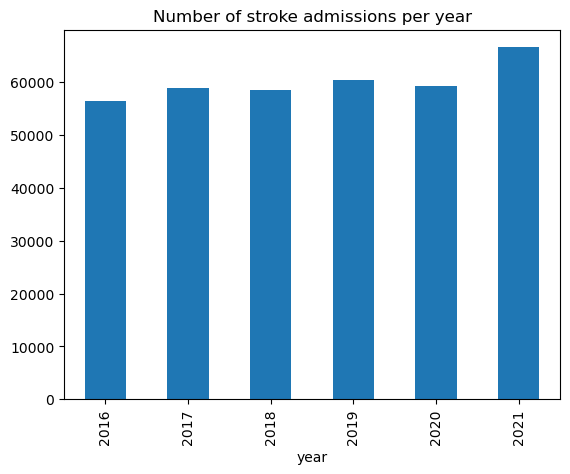

In [8]:
# Admissions per year
yearly_admissions_full = (full_data
                          .groupby('year')
                          .size()
                          .reset_index(name='admissions'))
yearly_admissions_full.plot.bar(
    x='year', y='admissions',
    title='Number of stroke admissions per year',
    legend=None)
plt.show()

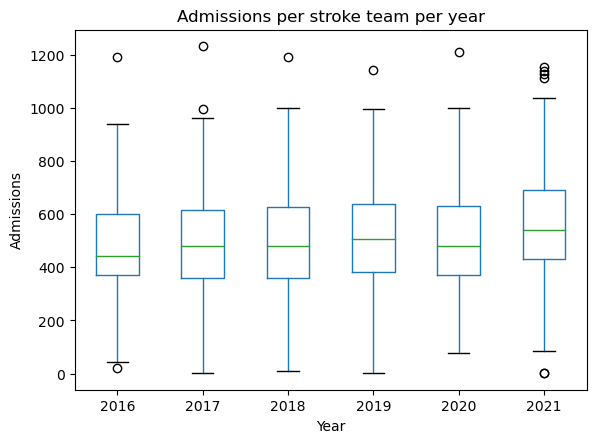

In [9]:
# Find number of admissions per stroke team per year
full_team_admissions_yearly = (
    full_data
    .groupby(['stroke_team', 'year'])
    .size()
    .reset_index(name='admissions'))

# Plot per year
full_team_admissions_yearly.boxplot('admissions', by='year')
plt.xlabel('Year')
plt.ylabel('Admissions')
plt.title('Admissions per stroke team per year')
plt.suptitle('')
plt.grid(None)
plt.show()

Restricted dataset

In [10]:
# Total admissions
len(data.index)

177631

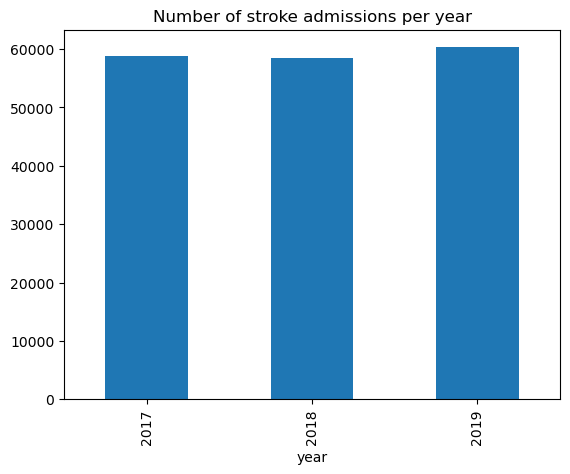

In [11]:
# Admissions per year
yearly_admissions = data.groupby('year').size().reset_index(name='admissions')
yearly_admissions.plot.bar(x='year', y='admissions',
                           title='Number of stroke admissions per year',
                           legend=None)
plt.show()

In [12]:
# Mean admissions per year
round(yearly_admissions['admissions'].mean(), 2)

59210.33

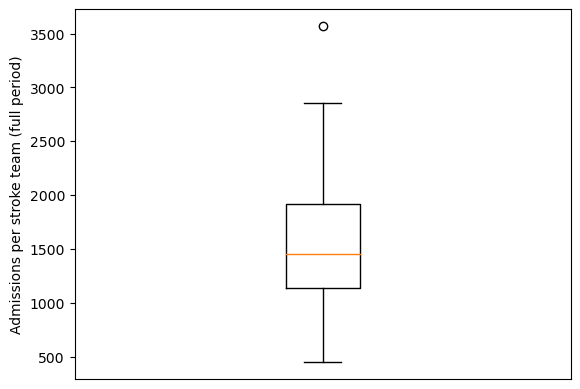

In [13]:
# Admissions per stroke team
team_admissions = data.groupby('stroke_team').size()

# Plot distribution of admissions
plt.boxplot(team_admissions)
plt.ylabel('Admissions per stroke team (full period)')

# Remove x axis ticks as only one variable
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)

plt.show()

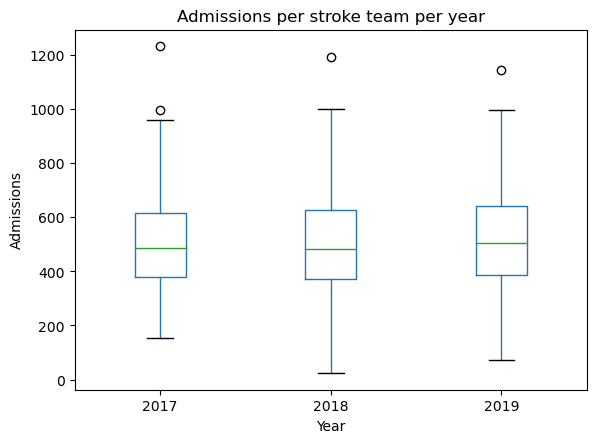

In [14]:
# Find number of admissions per stroke team per year
team_admissions_yearly = (data
                          .groupby(['stroke_team', 'year'])
                          .size()
                          .reset_index(name='admissions'))

# Plot per year
team_admissions_yearly.boxplot('admissions', by='year')
plt.xlabel('Year')
plt.ylabel('Admissions')
plt.title('Admissions per stroke team per year')
plt.suptitle('')
plt.grid(None)
plt.show()

## Stroke types

In [15]:
n_freq(data['infarction'].map({1: 'Infarction',
                               0: 'Primary Intracerebral Haemorrage'}))

,n,freq
Infarction,155367,0.874662
Primary Intracerebral Haemorrage,21546,0.121296
NaN,718,0.004042


## Thrombolysis and thrombectomy

In [16]:
# Thrombolysis use
n_freq(data['thrombolysis'])

,n,freq
0,156836,0.882931
1,20795,0.117069


In [17]:
# Thrombectomy use
n_freq(data['thrombectomy'])

,n,freq
0,175840,0.989917
1,1791,0.010083


In [18]:
# Thrombolysis and/or thrombectomy use
n_freq(data[['thrombolysis', 'thrombectomy']]).sort_values(by='thrombolysis')

,thrombolysis,thrombectomy,n,freq
0,0,0,156141,0.879019
3,0,1,695,0.003913
1,1,0,19699,0.110898
2,1,1,1096,0.006170


In [19]:
# Arrival by ambulance
n_freq(data['arrive_by_ambulance'])

,n,freq
1,139837,0.787233
0,37794,0.212767


In [20]:
# Thrombolysis use, depending on whether arrived by ambulance
(n_freq(data.groupby('arrive_by_ambulance')['thrombolysis'])
 .sort_values(by='arrive_by_ambulance'))

,arrive_by_ambulance,thrombolysis,n,freq
0,0,0,36287,0.960126
1,0,1,1507,0.039874
2,1,0,120549,0.862068
3,1,1,19288,0.137932


## Rough notes

In [21]:
# Rough notes

'''
# Arrival times
data['weekday'].value_counts()

data['month'].value_counts().sort_index()

data['year'].value_counts().sort_index()

data['arrival_time_3_hour_period'].value_counts().sort_index()

# Analyse by team - group by team, record:
# Team, admission numbers, thrombolysis rate, rank before stroke, NIHSS on arrival, proportion with known onset time (remove rest), proportion with onset <4 (remove rest)
# rankin again, proportion 80+, onset to arrival, scan within 4 hours, arrival to scan, thrombolysis given, scan to needle, arrival to needle, onset to needle, proportion thrombolysis after 180 or 270

# Based on analysis by team, summarise for whole population (average of each hospital)

# Those average summary results for under 80 v.s. over 80

# Figure with thrombolyysis use (all and < 4 hours onset)
# Figure proportion with known onset
# Mean arrival to scan time for patients
# Mean scan to needle time
# Mean arrival to needle time

# Stroke severity distribution

# Onset to arrival, proportion known onset, severity

# Restrict to patients who received thrombolysis
thrombolysed = data[data['thrombolysis'] == 1].copy()

# Proportion where onset is known
# throm_arrival['onset known'] = thrombolysed['onset known'].value_counts(normalize = True)[1]

# Arrival within 4 or 6 hours
thrombolysed['arrive_within_4'] = np.where(thrombolysed['onset_to_arrival_time'] <= 240, 1, 0)
thrombolysed['arrive_within_6'] = np.where(thrombolysed['onset_to_arrival_time'] <= 360, 1, 0)

# NIHSS 6+ or 11+
thrombolysed['nihss_6_plus'] = np.where(thrombolysed['stroke_severity'] >= 6, 1, 0)
thrombolysed['nihss_11_plus'] = np.where(thrombolysed['stroke_severity'] >= 11, 1, 0)

# Find results overall, by arrival time group, and by NIHSS group
# thrombolysed.groupby('arrive_within_4').mean()
'''


"\n# Arrival times\ndata['weekday'].value_counts()\n\ndata['month'].value_counts().sort_index()\n\ndata['year'].value_counts().sort_index()\n\ndata['arrival_time_3_hour_period'].value_counts().sort_index()\n\n# Analyse by team - group by team, record:\n# Team, admission numbers, thrombolysis rate, rank before stroke, NIHSS on arrival, proportion with known onset time (remove rest), proportion with onset <4 (remove rest)\n# rankin again, proportion 80+, onset to arrival, scan within 4 hours, arrival to scan, thrombolysis given, scan to needle, arrival to needle, onset to needle, proportion thrombolysis after 180 or 270\n\n# Based on analysis by team, summarise for whole population (average of each hospital)\n\n# Those average summary results for under 80 v.s. over 80\n\n# Figure with thrombolyysis use (all and < 4 hours onset)\n# Figure proportion with known onset\n# Mean arrival to scan time for patients\n# Mean scan to needle time\n# Mean arrival to needle time\n\n# Stroke severity di

14:80: E501 line too long (170 > 79 characters)
15:80: E501 line too long (200 > 79 characters)
17:80: E501 line too long (86 > 79 characters)
35:80: E501 line too long (94 > 79 characters)
38:80: E501 line too long (94 > 79 characters)
39:80: E501 line too long (94 > 79 characters)
42:80: E501 line too long (83 > 79 characters)
43:80: E501 line too long (85 > 79 characters)
48:1: W391 blank line at end of file
